# Customer Churn Prediction

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Dataset

In [10]:
path_to_dataset = 'D:\\DATASETS\\Kaggle\\Bank Customer Churn Prediction Dataset\\Churn_Modelling.csv'

In [11]:
df = pd.read_csv(path_to_dataset)

In [12]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
df.loc[0]

RowNumber                  1
CustomerId          15634602
Surname             Hargrave
CreditScore              619
Geography             France
Gender                Female
Age                       42
Tenure                     2
Balance                  0.0
NumOfProducts              1
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    101348.88
Exited                     1
Name: 0, dtype: object

In [14]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
list = df.duplicated()
for x in list:
    if x == True: print(list.index(x))

## Preprocesing Data

In [17]:
df.drop(columns = ['RowNumber',	'CustomerId',	'Surname'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
geo_new = pd.get_dummies(df['Geography'])
print(geo_new)

      France  Germany  Spain
0       True    False  False
1      False    False   True
2       True    False  False
3       True    False  False
4      False    False   True
...      ...      ...    ...
9995    True    False  False
9996    True    False  False
9997    True    False  False
9998   False     True  False
9999    True    False  False

[10000 rows x 3 columns]


In [20]:
gender_new = pd.get_dummies(df['Gender'])
print(gender_new)

      Female   Male
0       True  False
1       True  False
2       True  False
3       True  False
4       True  False
...      ...    ...
9995   False   True
9996   False   True
9997    True  False
9998   False   True
9999    True  False

[10000 rows x 2 columns]


In [21]:
X_to_be_scaled = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',	'IsActiveMember',	'EstimatedSalary']]

In [22]:
# scaling the columns 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',	'IsActiveMember',	'EstimatedSalary'
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_X_columns = scaler.fit_transform(X_to_be_scaled)
scaled_X_columns

array([[-0.32622142,  0.29351742, -1.04175968, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  0.19816383, -1.38753759, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418,  0.29351742,  1.03290776, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.27860412,  0.68712986, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.29351742, -0.69598177, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -1.04143285, -0.35020386, ...,  0.64609167,
        -1.03067011, -1.07636976]])

In [23]:
scaled_X_columns = pd.DataFrame(scaled_X_columns)

In [24]:
X = pd.concat([scaled_X_columns,geo_new,gender_new], axis = 1)
X.columns = X.columns.astype(str)
print(X.head())

          0         1         2         3         4         5         6  \
0 -0.326221  0.293517 -1.041760 -1.225848 -0.911583  0.646092  0.970243   
1 -0.440036  0.198164 -1.387538  0.117350 -0.911583 -1.547768  0.970243   
2 -1.536794  0.293517  1.032908  1.333053  2.527057  0.646092 -1.030670   
3  0.501521  0.007457 -1.387538 -1.225848  0.807737 -1.547768 -1.030670   
4  2.063884  0.388871 -1.041760  0.785728 -0.911583  0.646092  0.970243   

          7  France  Germany  Spain  Female   Male  
0  0.021886    True    False  False    True  False  
1  0.216534   False    False   True    True  False  
2  0.240687    True    False  False    True  False  
3 -0.108918    True    False  False    True  False  
4 -0.365276   False    False   True    True  False  


In [25]:
y = df['Exited']
print(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64


## Models

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
clf1 = LogisticRegression()
clf1.fit(X,y)

LogisticRegression()

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
clf2 = RandomForestClassifier(random_state = 0)
clf2.fit(X,y)

RandomForestClassifier(random_state=0)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier

In [31]:
clf3 = GradientBoostingClassifier(random_state = 0)
clf3.fit(X,y)

GradientBoostingClassifier(random_state=0)

## Model prediction and evaluation

In [32]:
model_list = ['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier']

In [33]:
y_pred1 = clf1.predict(X)
y_pred2 = clf2.predict(X)
y_pred3 = clf3.predict(X)

y_pred = np.vstack((y_pred1,y_pred2,y_pred3))

In [34]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

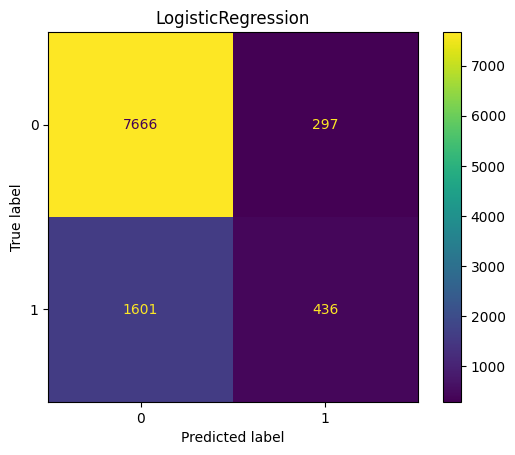

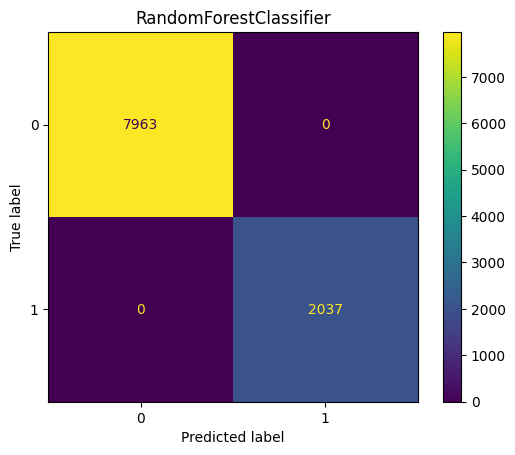

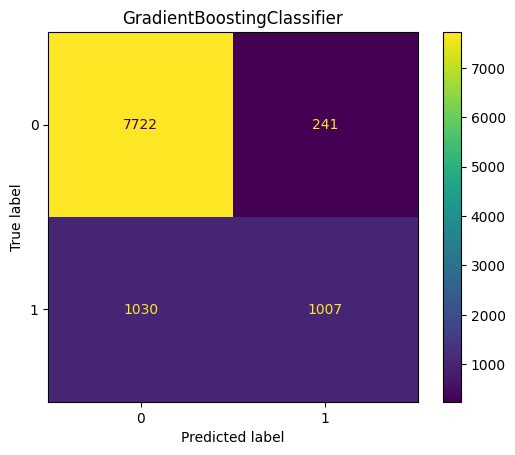

In [35]:
def plot_confusion_matrix():
    for i in range(len(model_list)):
        from sklearn.metrics import confusion_matrix
        ConfusionMatrix = confusion_matrix(y,y_pred[i])
        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix , display_labels = [0,1])
        cm_display.plot()
        plt.title(model_list[i])

    plt.show()

plot_confusion_matrix()

In [37]:
def models_accuracy():
    print('Accuracy of models :')
    for i in range(len(model_list)):
        print(model_list[i],':',accuracy_score(y,y_pred[i]))

models_accuracy()

Accuracy of models :
LogisticRegression : 0.8102
RandomForestClassifier : 1.0
GradientBoostingClassifier : 0.8729
